In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot  as plt
import folium
from folium.plugins import MarkerCluster
import mplleaflet

AIS_path = r'.\Data'
AIS_data = []

# Iterate over files in the directory
for file_name in os.listdir(AIS_path):
    # Construct full file path
    file_path = os.path.join(AIS_path, file_name)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Open and read the file
        with open(file_path) as f:
            # Load JSON data from the file
            json_data = json.load(f)
            # Append loaded data to the list
            AIS_data.append(json_data)

# Normalize the JSON data
data_normalized = pd.json_normalize(AIS_data, 'data')

# Now you can work with your DataFrame 'data_normalized'
data_normalized

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [3]:
# data_normalized['vessel.type'].unique()
data_normalized['vessel.name'].unique()
# data_normalized['navigation.status'].unique()
# data_normalized['navigation.destination.name'].unique()
# data_normalized['navigation.location.long'].unique()

data_normalized['vessel.name'].value_counts()

TRUDIE            8909
JORDY-M           8906
CHARLOIS          8721
LEVANTE           8202
WESTERSCHELDE     7469
ROMEE             7198
JAN LEEGHWATER    7009
CAAN              7008
HELENA            6414
AARBURG           6339
ORION             1982
SUNMI             1128
MARIBO MAERSK      691
MAYVIEW MAERSK      25
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: vessel.name, dtype: int64

In [4]:
# data_normalized = data_normalized.drop_duplicates(subset=['vessel.imo', 'navigation.time'], keep='last')

# # Filter DataFrame based on the range of coordinates
# # Define the range of coordinates to keep
# min_lat = 51.3
# max_lat = 53.9
# min_lon = 3.1
# max_lon = 6.1

# filtered_df = data_normalized[(data_normalized['navigation.location.lat'] >= min_lat) & (data_normalized['navigation.location.lat'] <= max_lat) &
#                 (data_normalized['navigation.location.long'] >= min_lon) & (data_normalized['navigation.location.long'] <= max_lon)]
# filtered_df
# df = filtered_df
# df


# df = filtered_df[(data_normalized['navigation.status'] == 'moored') | (data_normalized['navigation.status'] == 'at-anchor')]
# df

from shapely.geometry import Point, Polygon

# Define the coordinates of the polygon
polygon_coords = [(51.549,3.080), (51.334,3.384), (51.317,4.198), (51.374,4.263), (51.798,6.065), (51.874,6.133), (53.752,6.349), (53.526,4.370)]

# Create a Shapely Polygon object
polygon = Polygon(polygon_coords)

# Function to check if a point (latitude, longitude) is within the polygon
def is_within_polygon(lat, lon):
    point = Point(lat, lon)
    return polygon.contains(point)

# Filter DataFrame based on the polygon
df = data_normalized[data_normalized.apply(lambda row: is_within_polygon(row['navigation.location.lat'], row['navigation.location.long']), axis=1)]

# Drop duplicates
df = df.drop_duplicates(subset=['vessel.imo', 'navigation.time'], keep='last')

# Resulting filtered DataFrame
df


,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
6,3.0,2021-01-01T00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [5]:
# df['vessel.callsign'].unique()
# df['device.mmsi'].unique()
# df['vessel.imo'].unique()

# Deze is waarschijnlijk het meest betrouwbaar gezien schepen echt hun eigen naam hebben. Niemand gebruikt dubbele namen.
df['vessel.name'].unique()
df['vessel.name'].value_counts()

TRUDIE            8797
JORDY-M           7129
WESTERSCHELDE     6694
LEVANTE           6646
CHARLOIS          5737
JAN LEEGHWATER    5057
ROMEE             4784
CAAN              4773
AARBURG           3025
ORION             1956
HELENA            1126
SUNMI              709
MARIBO MAERSK      681
MAYVIEW MAERSK      15
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: vessel.name, dtype: int64

In [14]:
vessel_name_counts = df['vessel.name'].value_counts()
df = df[df['vessel.name'].isin(vessel_name_counts.index[vessel_name_counts > 5])]

df

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
6,3.0,2021-01-01T00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [15]:
df['vessel.type'].value_counts()

cargo                      30084
dredging-underwater-ops    11751
other                       9557
tanker                      5737
Name: vessel.type, dtype: int64

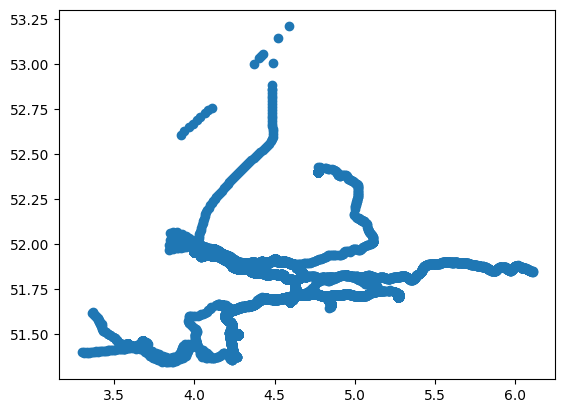

In [8]:
all_locations = plt.scatter(df['navigation.location.long'], df['navigation.location.lat'])

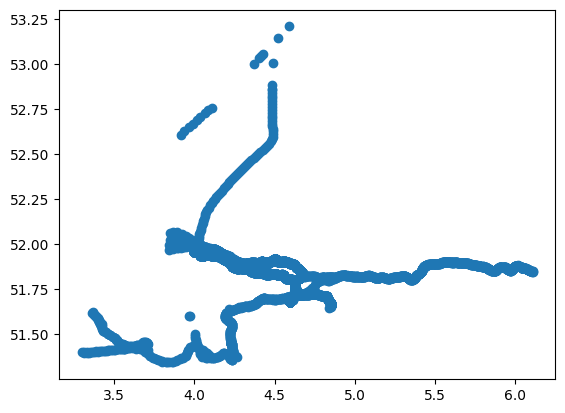

In [9]:
df_test1 = df[(df['vessel.type'] == 'cargo')]
locations = plt.scatter(df_test1['navigation.location.long'], df_test1['navigation.location.lat'])

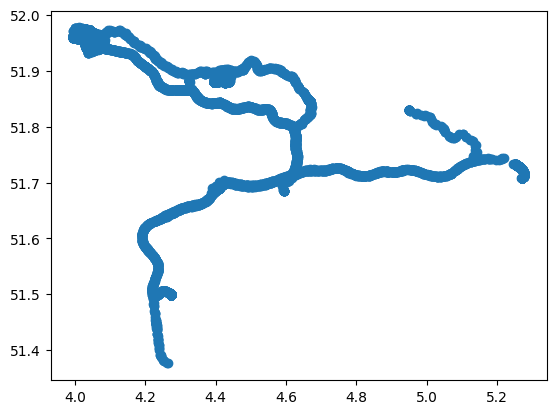

In [10]:
df_test2 = df[(df['vessel.type'] == 'other')]
locations = plt.scatter(df_test2['navigation.location.long'], df_test2['navigation.location.lat'])

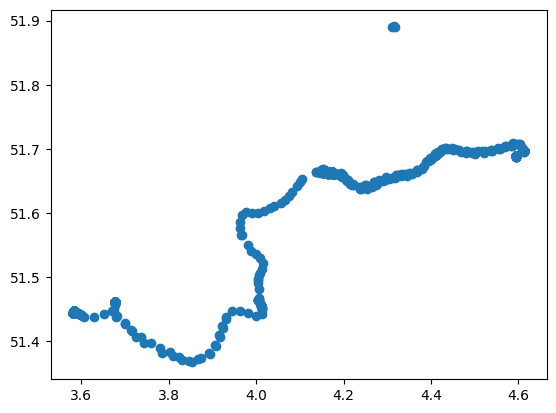

In [11]:
df_test3 = df[(df['vessel.type'] == 'dredging-underwater-ops')]
locations = plt.scatter(df_test3['navigation.location.long'], df_test3['navigation.location.lat'])

In [12]:
# Create a folium map centered at the mean latitude and longitude
map_center = [df['navigation.location.lat'].mean(), df['navigation.location.long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    folium.Marker(location=[row['navigation.location.lat'], row['navigation.location.long']]).add_to(marker_cluster)

scatter_html = mplleaflet.fig_to_html(plt.gcf())

# Create a folium iframe to embed the scatterplot HTML
scatter_frame = folium.IFrame(html=scatter_html, width=500, height=300)
scatter_popup = folium.Popup(scatter_frame, max_width=500)

# Add the scatterplot as a popup to the folium map
folium.Marker(location=map_center, popup=scatter_popup).add_to(m)
    
# m.save('filtered_data.html')
# m


In [20]:
# Functie om string naar datetime object om te zetten
def convert_to_datetime(datetime_str):
    return pd.to_datetime(datetime_str)

# Nieuwe kolommen toevoegen
# df['navigation.time'] = df['navigation.time'].apply(convert_to_datetime)
df['date'] = df['navigation.time'].dt.date
df['time'] = df['navigation.time'].dt.time

# Dataframe weergeven
df

C:\Users\romyl\AppData\Local\Temp\ipykernel_24644\2428716371.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['navigation.time'].dt.date
C:\Users\romyl\AppData\Local\Temp\ipykernel_24644\2428716371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['navigation.time'].dt.time


,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,...,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name,date,time
0,3.0,2021-01-01 00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,...,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER,2021-01-01,00:04:34
1,3.0,2021-01-01 00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,...,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER,2021-01-01,00:10:34
3,3.0,2021-01-01 00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,...,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER,2021-01-01,00:16:34
4,3.0,2021-01-01 00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,...,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER,2021-01-01,00:22:33
6,3.0,2021-01-01 00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,...,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER,2021-01-01,00:28:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31 23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,...,5,4,244750043,PE9379,None,cargo,0,TRUDIE,2021-01-31,23:36:56
80010,0.0,2021-01-31 23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,...,5,4,244750043,PE9379,None,cargo,0,TRUDIE,2021-01-31,23:41:57
80011,0.0,2021-01-31 23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,...,5,4,244750043,PE9379,None,cargo,0,TRUDIE,2021-01-31,23:46:57
80012,0.0,2021-01-31 23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,...,5,4,244750043,PE9379,None,cargo,0,TRUDIE,2021-01-31,23:51:57


In [31]:
# Group by 'vessel.name' and 'navigation.status' and aggregate start and end time
result = df.groupby(['vessel.name', 'navigation.status']).agg(start_time=('navigation.time', 'min'), end_time=('navigation.time', 'max'))

# Format the output
for index, row in result.iterrows():
    print(f"{index[0]}: {row['start_time'].isoformat()} - {row['end_time'].isoformat()} {index[1]}")

AARBURG: 2021-01-01T00:06:28+00:00 - 2021-01-27T07:20:11+00:00 moored
AARBURG: 2021-01-01T14:41:59+00:00 - 2021-01-27T08:51:58+00:00 under-way-using-engine
CAAN: 2021-01-04T12:54:13+00:00 - 2021-01-31T12:12:55+00:00 moored
CAAN: 2021-01-04T15:57:03+00:00 - 2021-01-31T09:06:06+00:00 under-way-using-engine
CHARLOIS: 2021-01-01T00:01:43+00:00 - 2021-01-30T18:26:09+00:00 fishing
HELENA: 2021-01-01T00:01:49+00:00 - 2021-01-31T23:48:49+00:00 moored
JAN LEEGHWATER: 2021-01-01T00:04:34+00:00 - 2021-01-30T07:58:35+00:00 moored
JORDY-M: 2021-01-01T00:00:11+00:00 - 2021-01-31T23:56:15+00:00 moored
JORDY-M: 2021-01-01T13:12:01+00:00 - 2021-01-31T22:31:21+00:00 under-way-using-engine
LEVANTE: 2021-01-01T00:25:34+00:00 - 2021-01-31T23:56:58+00:00 under-way-using-engine
MARIBO MAERSK: 2021-01-29T16:36:58+00:00 - 2021-01-31T23:55:57+00:00 moored
MARIBO MAERSK: 2021-01-29T13:56:52+00:00 - 2021-01-29T16:31:50+00:00 under-way-using-engine
MAYVIEW MAERSK: 2021-01-18T13:31:34+00:00 - 2021-01-18T16:00:34+00

In [28]:
moored_times = []

# Itereren door elke rij
for index, row in df.iterrows():
    # Controleer of de 'navigation.status' gelijk is aan 'moored'
    if row['navigation.status'] == 'moored':
        # Voeg de tijd toe aan de lijst
        moored_times.append(row['time'])

# Print de opgeslagen tijden
print("Tijden wanneer 'navigation.status' gelijk is aan 'moored':", moored_times)

Tijden wanneer 'navigation.status' gelijk is aan 'moored': [datetime.time(0, 4, 34), datetime.time(0, 10, 34), datetime.time(0, 16, 34), datetime.time(0, 22, 33), datetime.time(0, 28, 34), datetime.time(0, 40, 34), datetime.time(0, 46, 34), datetime.time(0, 49, 35), datetime.time(0, 52, 35), datetime.time(1, 1, 35), datetime.time(1, 4, 34), datetime.time(1, 10, 35), datetime.time(1, 16, 33), datetime.time(1, 22, 34), datetime.time(1, 28, 33), datetime.time(1, 40, 34), datetime.time(1, 46, 35), datetime.time(1, 52, 34), datetime.time(2, 10, 35), datetime.time(2, 16, 35), datetime.time(2, 22, 33), datetime.time(2, 28, 34), datetime.time(2, 34, 32), datetime.time(2, 40, 35), datetime.time(2, 43, 35), datetime.time(3, 1, 33), datetime.time(3, 4, 35), datetime.time(3, 16, 33), datetime.time(3, 22, 33), datetime.time(3, 31, 33), datetime.time(3, 40, 32), datetime.time(3, 46, 32), datetime.time(3, 49, 34), datetime.time(3, 55, 33), datetime.time(4, 1, 31), datetime.time(4, 10, 32), datetime.t

In [32]:
# Get the rows where 'navigation.status' changes
df['status_change'] = df['navigation.status'] != df['navigation.status'].shift(1)
df['group'] = df['status_change'].cumsum()

# Group by 'vessel.name', 'group', and 'navigation.status' and aggregate start and end time
result = df.groupby(['vessel.name', 'group', 'navigation.status']).agg(start_time=('navigation.time', 'min'), end_time=('navigation.time', 'max'))

# Format the output
for index, row in result.iterrows():
    print(f"{index[0]}: {row['start_time'].isoformat()} - {row['end_time'].isoformat()} {index[2]}")

C:\Users\romyl\AppData\Local\Temp\ipykernel_24644\1509953073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_change'] = df['navigation.status'] != df['navigation.status'].shift(1)
C:\Users\romyl\AppData\Local\Temp\ipykernel_24644\1509953073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['status_change'].cumsum()


AARBURG: 2021-01-01T00:06:28+00:00 - 2021-01-01T08:24:29+00:00 moored
AARBURG: 2021-01-01T08:30:29+00:00 - 2021-01-01T14:36:28+00:00 moored
AARBURG: 2021-01-01T14:41:59+00:00 - 2021-01-01T15:41:58+00:00 under-way-using-engine
AARBURG: 2021-01-01T15:45:25+00:00 - 2021-01-01T16:00:27+00:00 moored
AARBURG: 2021-01-01T16:06:46+00:00 - 2021-01-01T16:27:00+00:00 under-way-using-engine
AARBURG: 2021-01-01T16:30:27+00:00 - 2021-01-01T22:51:28+00:00 moored
AARBURG: 2021-01-01T22:57:01+00:00 - 2021-01-01T23:37:01+00:00 under-way-using-engine
AARBURG: 2021-01-01T23:41:32+00:00 - 2021-01-01T23:59:33+00:00 moored
AARBURG: 2021-01-02T00:05:32+00:00 - 2021-01-02T00:41:33+00:00 moored
AARBURG: 2021-01-02T00:46:58+00:00 - 2021-01-02T01:06:59+00:00 under-way-using-engine
AARBURG: 2021-01-02T01:09:09+00:00 - 2021-01-02T01:45:06+00:00 moored
AARBURG: 2021-01-02T01:51:54+00:00 - 2021-01-02T02:21:55+00:00 under-way-using-engine
AARBURG: 2021-01-02T02:26:55+00:00 - 2021-01-02T14:53:38+00:00 moored
AARBURG: 2